In [1]:
import pandas as pd
import zipfile
import seaborn as sns
import numpy as np

In [2]:
data_path="../data/data_accuracy/"

In [3]:
sales_train_validation_small = pd.read_csv(data_path+"/data_trainval_long.csv")

In [4]:
sales_train_validation_small.head()

,id,d,sale
0,HOBBIES_1_001_CA_1_validation,d_1,0
1,HOBBIES_1_002_CA_1_validation,d_1,0
2,HOBBIES_1_003_CA_1_validation,d_1,0
3,HOBBIES_1_004_CA_1_validation,d_1,0
4,HOBBIES_1_005_CA_1_validation,d_1,0


In [5]:
sales_train_validation_small["id"].nunique()

30490

In [6]:
sales_train_validation_small["log_sales"]=np.log(sales_train_validation_small["sale"]+1)

In [7]:
calender=pd.read_csv(data_path+"calendar.csv")

In [8]:
calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [9]:
def sales_plot(data,calender,level,in_calender=True,log_value=True,hue=None,scale=True):
    if(in_calender):
        temp_data=pd.merge(sales_train_validation_small,calender[["d",level]],on='d')
    else:
        temp_data=data
    if(log_value):
        col="log_sales"
    else:
        col="sale"
        
        
    def min_max(x,col):
        
        mn = x["min"]
        mx= x["max"]
        return((x[col]-mn)/(mx-mn))
    
    
    if(hue):
        grouped_sales = temp_data[[level,hue,col]].groupby([level,hue]).sum()
        grouped_sales.reset_index(inplace=True)
        grouped_sales.columns=[level,hue,col]
        gg=grouped_sales.groupby(hue).agg({col:[np.min,np.max]})
        gg.reset_index(inplace=True)
        gg.columns=[hue,"min","max"]
        grouped_sales=pd.merge(grouped_sales,gg,on=hue)
        grouped_sales[col]=grouped_sales.apply(lambda x:min_max(x,col),axis=1)
        del gg

        sns.lineplot(x=level,y=col,data=grouped_sales,hue=hue)
    else:
        grouped_sales = temp_data[[level,col]].groupby(level).sum()
        grouped_sales.reset_index(inplace=True)
        grouped_sales.columns=[level,col]
        sns.lineplot(x=level,y=col,data=grouped_sales)

    del grouped_sales                                                                  

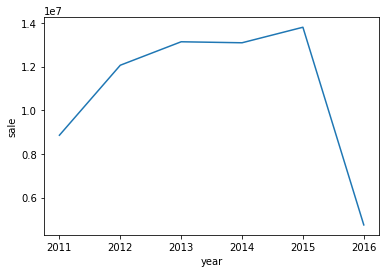

In [10]:
sales_plot(sales_train_validation_small,calender,"year",log_value=False)

In [11]:
sales_train_validation_small["type"]=sales_train_validation_small["id"].apply(lambda x:x.split("_")[0])

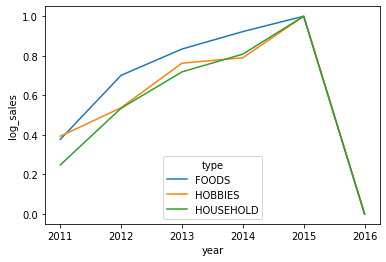

In [12]:
sales_plot(sales_train_validation_small,calender,"year",log_value=True,hue="type")

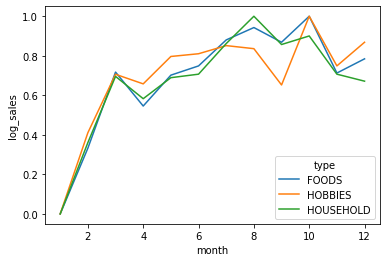

In [13]:
sales_plot(sales_train_validation_small,calender[calender["year"]!=2016],"month",hue="type")

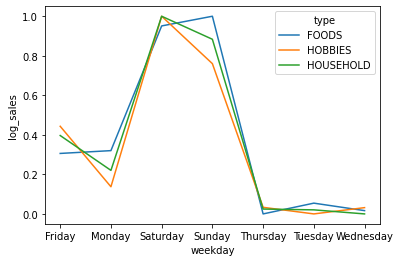

In [14]:
sales_plot(sales_train_validation_small,calender[calender["year"]!=2016],"weekday",hue="type")

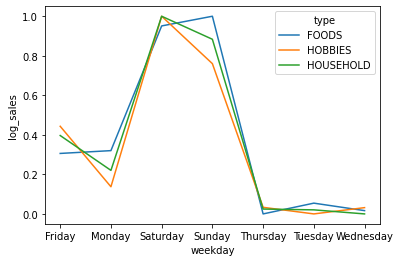

In [15]:
sales_plot(sales_train_validation_small,calender[calender["year"]!=2016],"weekday",hue="type")

In [17]:
sales_train_validation_small["not_zero"]=sales_train_validation_small["sale"].apply(lambda x:1 if x>0 else 0)

In [28]:
grouped_sales = sales_train_validation_small[["d","not_zero"]].groupby("d").sum()

In [29]:
grouped_sales.reset_index(inplace=True)

In [30]:
grouped_sales["day"]=grouped_sales["d"].apply(lambda x:int(x.split("_")[-1]))

In [31]:
grouped_sales.sort_values("day",inplace=True)

In [32]:
grouped_sales

,d,not_zero,day
0,d_1,6979,1
1025,d_2,6880,2
1136,d_3,5990,3
1247,d_4,5972,4
1358,d_5,5068,5
...,...,...,...
1011,d_1909,12475,1909
1013,d_1910,12266,1910
1014,d_1911,13383,1911
1015,d_1912,14772,1912


<AxesSubplot:xlabel='d', ylabel='not_zero'>

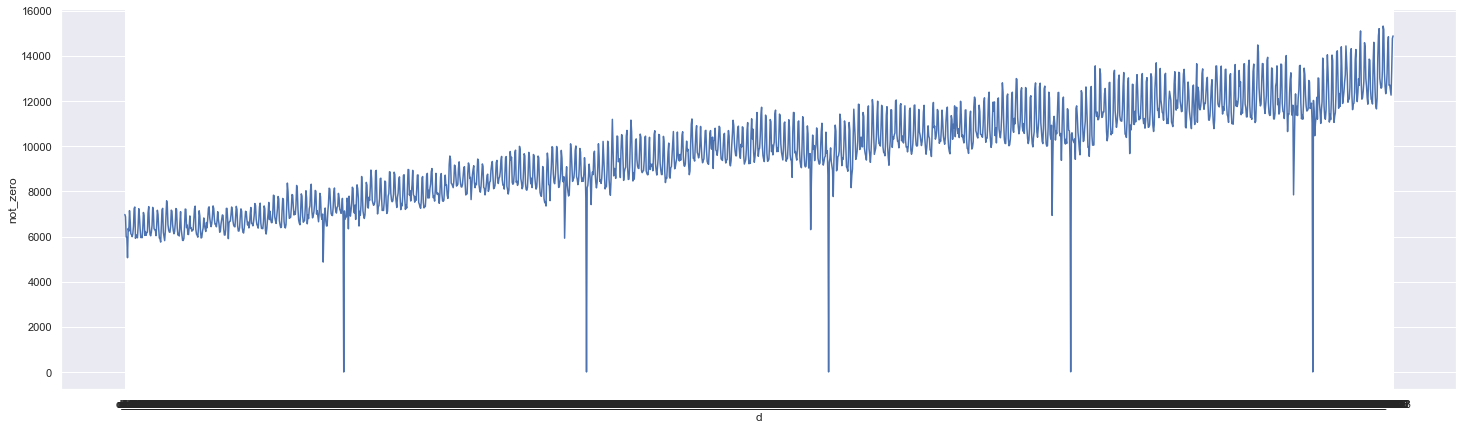

In [35]:
sns.set(rc={'figure.figsize':(25,7)})
sns.lineplot(x="d",y="not_zero",data=grouped_sales)

In [50]:
list_low_peak = grouped_sales[grouped_sales["not_zero"]<2000]["d"].tolist()

In [51]:
calender[calender.d.isin(list_low_peak)]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
330,2011-12-25,11148,Sunday,2,12,2011,d_331,Christmas,National,NaN,NaN,0,0,0
696,2012-12-25,11248,Tuesday,4,12,2012,d_697,Christmas,National,NaN,NaN,0,0,0
1061,2013-12-25,11348,Wednesday,5,12,2013,d_1062,Christmas,National,NaN,NaN,0,0,0
1426,2014-12-25,11447,Thursday,6,12,2014,d_1427,Christmas,National,NaN,NaN,0,0,0
1791,2015-12-25,11547,Friday,7,12,2015,d_1792,Christmas,National,NaN,NaN,0,0,0


<AxesSubplot:xlabel='day', ylabel='not_zero'>

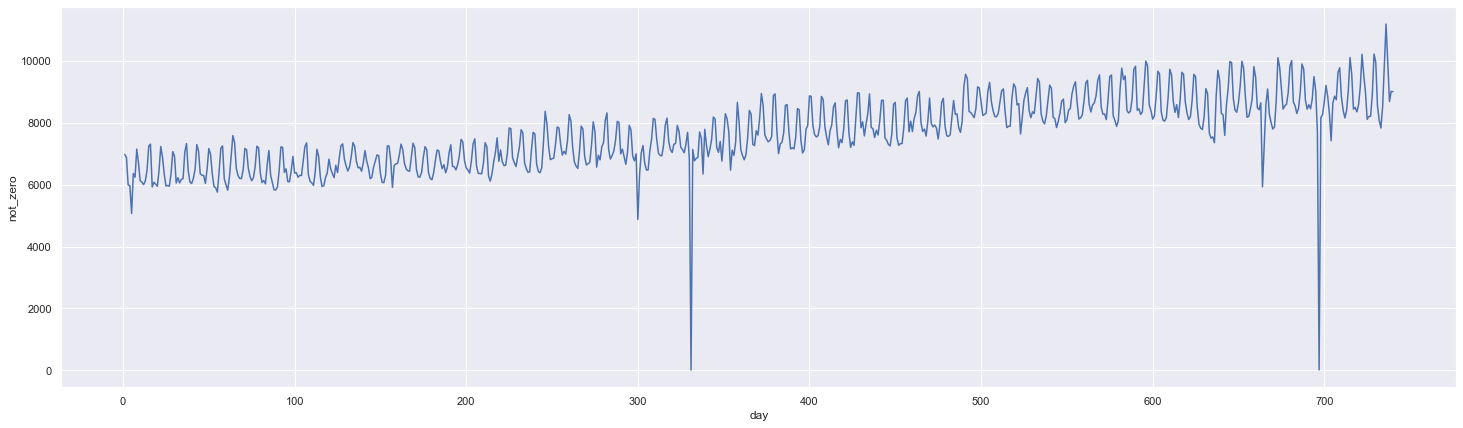

In [59]:
sns.set(rc={'figure.figsize':(25,7)})
sns.lineplot(x="day",y="not_zero",data=grouped_sales[0:740])

In [53]:
list_2low_peak = grouped_sales[(grouped_sales["not_zero"]>2000) & (grouped_sales["not_zero"]<5500)]["d"]

In [54]:
list_2low_peak

1358      d_5
1138    d_300
Name: d, dtype: object

In [55]:
calender[calender.d.isin(list_2low_peak)]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
299,2011-11-24,11143,Thursday,6,11,2011,d_300,Thanksgiving,National,NaN,NaN,0,0,0


In [56]:
list_3low_peak = grouped_sales[750:][(grouped_sales["not_zero"]>2000) & (grouped_sales["not_zero"]<6500)]["d"]

C:\Users\prateek\AppData\Local\Temp/ipykernel_16324/2001655038.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list_3low_peak = grouped_sales[750:][(grouped_sales["not_zero"]>2000) & (grouped_sales["not_zero"]<6500)]["d"]


In [57]:
list_3low_peak

41    d_1035
Name: d, dtype: object

In [58]:
calender[calender.d.isin(list_3low_peak)]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1034,2013-11-28,11344,Thursday,6,11,2013,d_1035,Thanksgiving,National,NaN,NaN,0,0,0


In [9]:
chris_thanks = calender[calender.event_type_1=="National"]["d"].tolist()

In [10]:
import pickle

In [11]:
with open("national.pickle","wb") as f:
     pickle.dump(chris_thanks,f)